<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**

### **House Price Prediction**

Nesta tarefa sobre previsão de preços de imóveis usando aprendizado de máquina, nossa tarefa é usar dados do censo da Califórnia para criar um modelo de aprendizado de máquina para prever os preços de imóveis no estado. Os dados incluem características como população, renda média e preços médios de casas para cada grupo de quarteirões na Califórnia.

Os grupos de quarteirões são a menor unidade geográfica que normalmente tem uma população de 600 a 3.000 pessoas. Podemos chamá-los abreviadamente de distritos. Em última análise, o nosso modelo de aprendizagem automática deve aprender com estes dados e ser capaz de prever o preço médio da habitação em qualquer bairro, tendo em conta todas as outras métricas.

Espero que você tenha entendido a definição do problema acima sobre a previsão dos preços das casas. Agora, apresentarei um projeto de aprendizado de máquina sobre previsão de preços de imóveis com Python. Vamos começar importando as bibliotecas Python necessárias e o conjunto de dados:

In [1]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

In [6]:
import pandas as pd
import numpy as np

dados = pd.read_csv(url)
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada linha representa um distrito e há 10 atributos no conjunto de dados. Agora vamos usar o método info() que é útil para obter uma descrição rápida dos dados, especialmente o número total de linhas, o tipo de cada atributo e o número de valores diferentes de zero:

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Existem 20.640 instâncias no conjunto de dados. Observe que o atributo total_bedrooms possui apenas 20.433 valores diferentes de zero, o que significa que 207 distritos não contêm valores. Teremos que lidar com isso mais tarde.

Todos os atributos são numéricos, exceto o campo ocean_proximity. Seu tipo é um objeto, portanto pode conter qualquer tipo de objeto Python. Você pode descobrir quais categorias existem naquela coluna e quantos distritos pertencem a cada categoria usando o método value_counts():

In [8]:
dados.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Outra maneira rápida de ter uma ideia do tipo de dados com os quais você está lidando é traçar um histograma para cada atributo numérico:

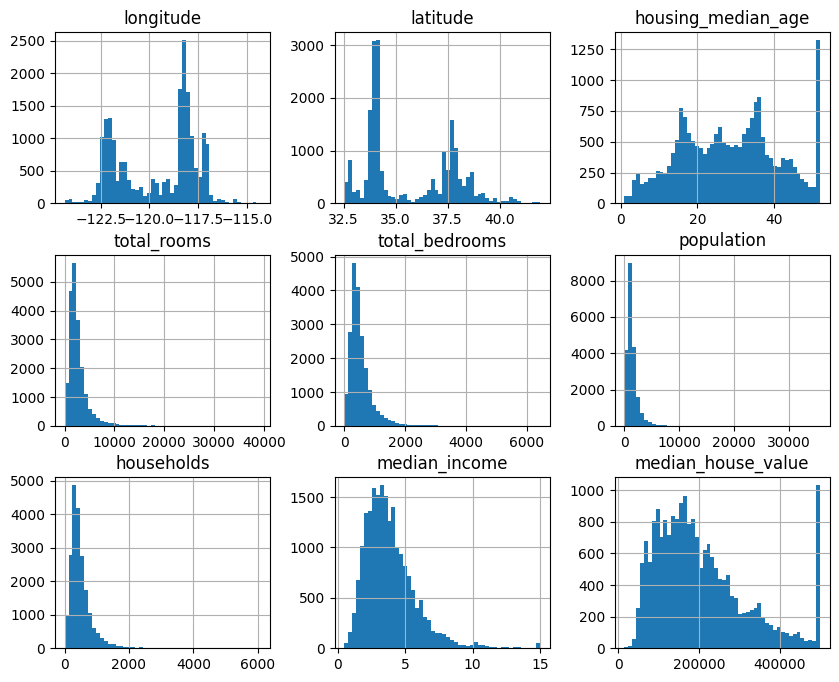

In [9]:
import matplotlib.pyplot as plt

dados.hist(bins=50, figsize=(10,8))
plt.show()

A próxima etapa nesta tarefa de previsão de preços de casas é dividir os dados em conjuntos de treinamento e teste. Criar um conjunto de testes é teoricamente simples: selecione algumas instâncias aleatoriamente, normalmente 20% do conjunto de dados (ou menos se o seu conjunto de dados for muito grande), e reserve-as:

In [15]:
from sklearn.model_selection import train_test_split

dados_treinamento, dados_teste = train_test_split(dados, test_size=0.20, random_state=42)

Vamos dar uma olhada mais de perto no histograma da renda mediana, já que a maioria dos valores da renda mediana se agrupam em torno de 1,5 a 6, mas alguns rendimentos medianos vão muito além de 6.

É importante ter um número suficiente de instâncias no seu conjunto de dados para cada estrato, caso contrário, a estimativa da importância de um estrato pode ser tendenciosa. Isso significa que você não deve ter muitos estratos e que cada estrato deve ser grande o suficiente:

<Axes: >

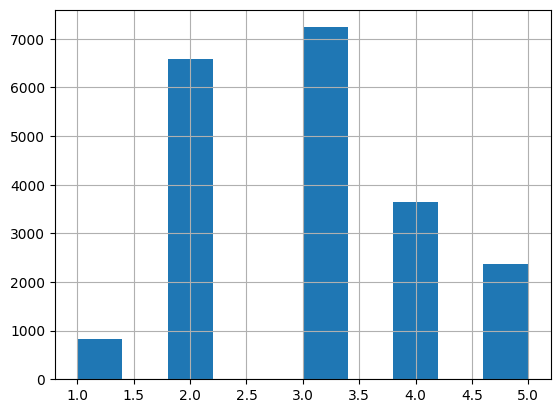

In [17]:
import numpy as np

dados['income_cat'] = pd.cut(dados['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
dados['income_cat'].hist()

### **Amostragem estratificada em conjunto de dados**

In [21]:
from ast import Str
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state = 42)

for train_index, test_index in split.split(dados, dados['income_cat']):
    strat_train_set = dados.loc[train_index]
    strat_test_set  = dados.loc[test_index]

print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


Agora você precisa remover o atributo Income_cat adicionado por nós para que os dados voltem ao seu formato:

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

dados = strat_train_set.copy()
dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


Agora, antes de criar um modelo de aprendizado de máquina para previsão de preços de imóveis com Python, vamos visualizar os dados em termos de longitude e latitude:

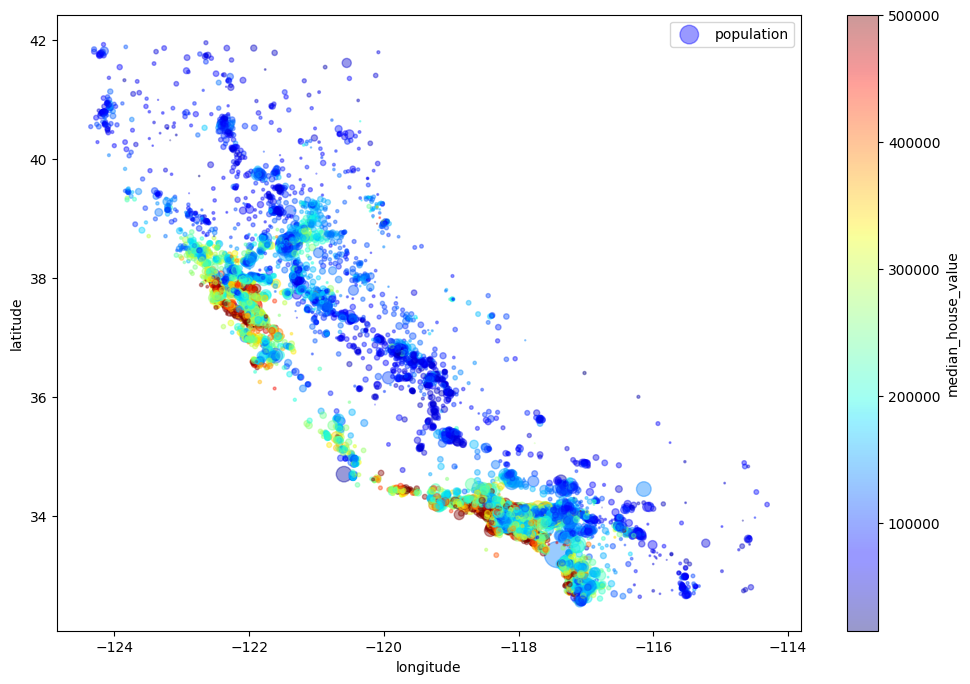

In [24]:
dados.plot(kind='scatter', x='longitude', y = 'latitude', alpha=0.4, s=dados['population'] / 100, label='population', figsize=(12,8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

O gráfico mostra os preços das casas na Califórnia, onde o vermelho é caro, o azul é barato e os círculos maiores indicam áreas com maior população.

### **Encontrando Correlações**

Como o conjunto de dados não é muito grande, você pode calcular facilmente o coeficiente de correlação padrão entre cada par de atributos usando o método corr():

In [25]:
correlacao = dados.corr()
print(correlacao.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


<ipython-input-25-59a303ca076e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


Os intervalos de correlação estão entre -1 e 1. Quando está próximo de 1 significa que existe uma correlação positiva e quando está próximo de -1 significa que existe uma correlação negativa. Quando está próximo de 0, significa que não há correlação linear.

Outra maneira de verificar a correlação entre atributos é usar a função pandas scatter_matrix(), que plota cada atributo numérico em relação a todos os outros atributos numéricos:

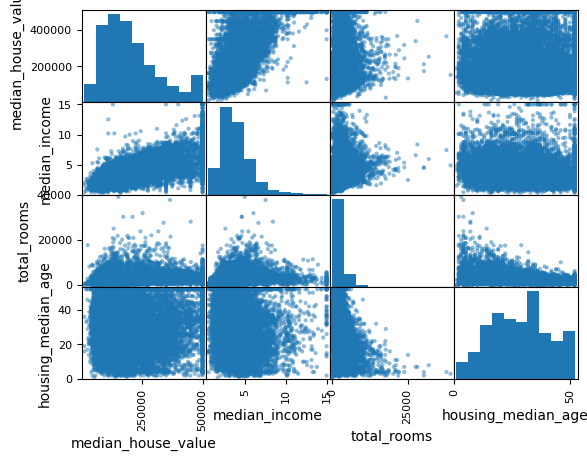

In [29]:
from pandas.plotting import scatter_matrix

X_features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(dados[X_features])
plt.show();

### **Regressão Linear para Previsão de Preços de Casas com Python**

Now I will use the linear regression algorithm for the task of house price prediction with Python:

In [40]:
from sklearn.linear_model import LinearRegression

dados_treinamento = dados_treinamento.dropna()
dados_teste = dados_teste.dropna()

Xtrain = dados_treinamento.drop(['median_house_value', 'ocean_proximity'], axis=1)
ytrain = dados_treinamento['median_house_value']

Xtest = dados_teste.drop(['median_house_value', 'ocean_proximity'], axis=1)
ytest = dados_teste['median_house_value']

modelo = LinearRegression()
modelo.fit(Xtrain, ytrain)

valor_predito = modelo.predict(Xtest)

print("Predições: ", valor_predito)

Predições:  [ 68104.73764704 237055.30314682 203641.50094351 ... 439178.19697502
 130408.85287046 175272.25192552]
